# Download Datasets

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23           5382        173  1.0              
surajjha101/stores-area-and-sales-data                                Supermarket store branches sales analysis            10KB  2022-04-29 11:10:16           4937        151  1.0              
devansodariya/student-performance-data                                Student Performance Dataset                           7KB  2022-05-26 13:55:09           1825        104  0.9705882        
paradisejoy/top-hits-spotify-f

In [ ]:
!kaggle datasets download -d ma7555/cat-breeds-dataset

100% 1.93G/1.93G [00:27<00:00, 110MB/s] 
100% 1.93G/1.93G [00:27<00:00, 74.5MB/s]


In [ ]:
# Unzip dataset

import zipfile

local_zip = './cat-breeds-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [ ]:
import os
class_names = os.listdir("./images")
class_names

['American Curl',
 'Balinese',
 'Turkish Van',
 'Cornish Rex',
 'Domestic Medium Hair',
 'York Chocolate',
 'Oriental Tabby',
 'Dilute Tortoiseshell',
 'Ocicat',
 'Tonkinese',
 'Egyptian Mau',
 'Bengal',
 'Tabby',
 'Chinchilla',
 'Birman',
 'Scottish Fold',
 'Chartreux',
 'Nebelung',
 'Norwegian Forest Cat',
 'Siamese',
 'Snowshoe',
 'Devon Rex',
 'American Bobtail',
 'Singapura',
 'British Shorthair',
 'Korat',
 'Dilute Calico',
 'Bombay',
 'Turkish Angora',
 'Sphynx - Hairless Cat',
 'Domestic Long Hair',
 'Ragamuffin',
 'Abyssinian',
 'Himalayan',
 'Manx',
 'Somali',
 'Persian',
 'Oriental Long Hair',
 'Extra-Toes Cat - Hemingway Polydactyl',
 'Silver',
 'Tuxedo',
 'Tiger',
 'Chausie',
 'Maine Coon',
 'Cymric',
 'Munchkin',
 'Burmese',
 'Calico',
 'Japanese Bobtail',
 'Havana',
 'Selkirk Rex',
 'Siberian',
 'Russian Blue',
 'Canadian Hairless',
 'Javanese',
 'Torbie',
 'Oriental Short Hair',
 'Tortoiseshell',
 'Applehead Siamese',
 'Pixiebob',
 'Exotic Shorthair',
 'Domestic Short H

In [ ]:
n_class = len(class_names)
n_class

67

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
import shutil
import random
import math
from shutil import copyfile
from keras.layers import Dense,GlobalAveragePooling2D
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import keras

# Preprocess Dataset

In [ ]:
source_path = "/content/images"
total_images = 0
for class_name in class_names:
  n_image = len(os.listdir(os.path.join(source_path, class_name)))
  print(f"There are {n_image} images of {class_name} cats.")
  total_images += n_image
print(f"Total images: {total_images} cats")

There are 149 images of American Curl cats.
There are 254 images of Balinese cats.
There are 815 images of Turkish Van cats.
There are 171 images of Cornish Rex cats.
There are 5482 images of Domestic Medium Hair cats.
There are 1 images of York Chocolate cats.
There are 101 images of Oriental Tabby cats.
There are 3152 images of Dilute Tortoiseshell cats.
There are 118 images of Ocicat cats.
There are 260 images of Tonkinese cats.
There are 305 images of Egyptian Mau cats.
There are 2477 images of Bengal cats.
There are 3012 images of Tabby cats.
There are 3 images of Chinchilla cats.
There are 227 images of Birman cats.
There are 380 images of Scottish Fold cats.
There are 84 images of Chartreux cats.
There are 148 images of Nebelung cats.
There are 580 images of Norwegian Forest Cat cats.
There are 2888 images of Siamese cats.
There are 1625 images of Snowshoe cats.
There are 119 images of Devon Rex cats.
There are 991 images of American Bobtail cats.
There are 22 images of Singapur

In [ ]:
# Define root directory
root_dir = '/content/cat-breeds-classification'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_test_dirs(root_path, class_names):
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter
  train_dir = os.path.join(root_path, 'training')
  val_dir = os.path.join(root_path, 'validation')

  directories = []
  for class_name in class_names:
    directories.append(os.path.join(train_dir, class_name))
    directories.append(os.path.join(val_dir, class_name))
  for directory in directories:
    os.makedirs(directory)

  
try:
  create_train_test_dirs(root_path=root_dir, class_names=class_names)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
# Test your create_train_test_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/cat-breeds-classification/validation
/content/cat-breeds-classification/training
/content/cat-breeds-classification/validation/American Curl
/content/cat-breeds-classification/validation/Balinese
/content/cat-breeds-classification/validation/Turkish Van
/content/cat-breeds-classification/validation/Cornish Rex
/content/cat-breeds-classification/validation/Domestic Medium Hair
/content/cat-breeds-classification/validation/York Chocolate
/content/cat-breeds-classification/validation/Oriental Tabby
/content/cat-breeds-classification/validation/Dilute Tortoiseshell
/content/cat-breeds-classification/validation/Ocicat
/content/cat-breeds-classification/validation/Tonkinese
/content/cat-breeds-classification/validation/Egyptian Mau
/content/cat-breeds-classification/validation/Bengal
/content/cat-breeds-classification/validation/Tabby
/content/cat-breeds-classification/validation/Chinchilla
/content/cat-breeds-classification/validation/Birman
/content/cat-breeds-classification/valid

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  filenames = []
  for filename in os.listdir(SOURCE):
    filepath = os.path.join(SOURCE, filename)
    if(os.path.getsize(filepath) > 0):
      filenames.append(filename)
    else:
      print("{} is zero length, so ignoring.".format(filename))
  
  len_src = len(filenames)
  len_train = int(len_src * SPLIT_SIZE)
  len_test = len_src - len_train
  shuffled_list = random.sample(filenames, len_src)
  train_list = shuffled_list[0:len_train]
  test_list = shuffled_list[-len_test:]

  for train_filename in train_list:
    srcpath = os.path.join(SOURCE, train_filename)
    trainpath = os.path.join(TRAINING, train_filename)
    copyfile(srcpath, trainpath)

  for test_filename in test_list:
    srcpath = os.path.join(SOURCE, test_filename)
    testpath = os.path.join(TESTING, test_filename)
    copyfile(srcpath, testpath)

In [ ]:
# Test your split_data function

# Define paths
paths = []
training_paths = []
validation_paths = []
for class_name in class_names:
  paths.append(os.path.join(source_path, class_name))
  training_paths.append(os.path.join(os.path.join(root_dir, 'training'), class_name))
  validation_paths.append(os.path.join(os.path.join(root_dir, 'validation'), class_name))

# Empty directories in case you run this cell multiple times
for training_path in training_paths:
  if len(os.listdir(training_path)) > 0:
    for file in os.scandir(training_path):
      os.remove(file.path)

for validation_path in validation_paths:
  if len(os.listdir(validation_path)) > 0:
    for file in os.scandir(validation_path):
      os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
for i in range(len(paths)):
  split_data(paths[i], training_paths[i], validation_paths[i], split_size)

# Check that the number of images matches the expected output
for training_path in training_paths:
  n_image = len(os.listdir(training_path))
  print(f"There are {n_image} images of {os.path.basename(os.path.dirname(training_path))} cats for training.")
for validation_path in validation_paths:
  n_image = len(os.listdir(validation_path))
  print(f"There are {n_image} images of {os.path.basename(os.path.dirname(validation_path))} cats for validation.")

There are 134 images of training cats for training.
There are 228 images of training cats for training.
There are 733 images of training cats for training.
There are 153 images of training cats for training.
There are 4933 images of training cats for training.
There are 0 images of training cats for training.
There are 90 images of training cats for training.
There are 2836 images of training cats for training.
There are 106 images of training cats for training.
There are 234 images of training cats for training.
There are 274 images of training cats for training.
There are 2229 images of training cats for training.
There are 2710 images of training cats for training.
There are 2 images of training cats for training.
There are 204 images of training cats for training.
There are 342 images of training cats for training.
There are 75 images of training cats for training.
There are 133 images of training cats for training.
There are 522 images of training cats for training.
There are 2599

# Show Sample of The Images

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = math.floor(n_class/2)
ncols = 4

pic_index = 0 # Index for iterating over images

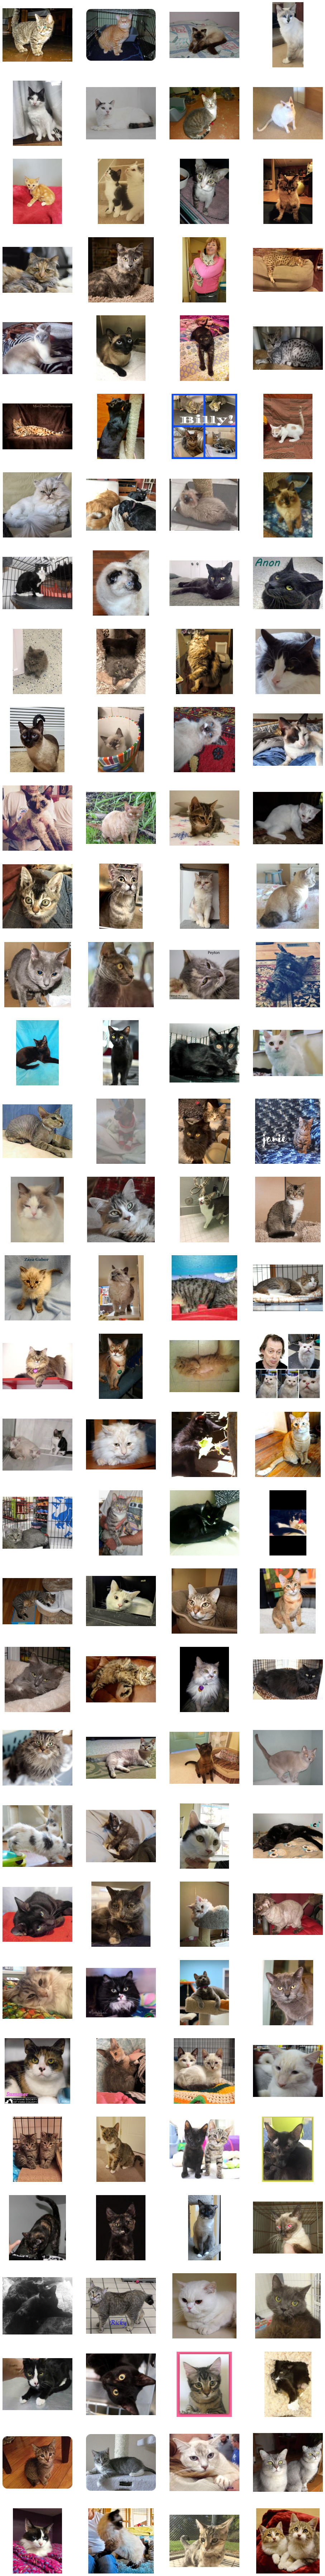

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=2

pix = []
for training_path in training_paths:
  next_pix = [os.path.join(training_path, fname) for fname in os.listdir(training_path)[ pic_index-2:pic_index]]
  pix += next_pix

for i, img_path in enumerate(pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Prepare Training and Validation Generator

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR, 
                         rotation_range = 45, width_shift_range = 0.2,
                         height_shift_range = 0.2, shear_range = 0.2
                         , zoom_range = 0.2, horizontal_flip = True,
                         batch_size = 16):
  # Instantiate the ImageDataGenerator class 
  # Don't forget to normalize pixel values and set arguments to augment the images 
  image_size = 150
  train_datagen = ImageDataGenerator(rescale = 1./255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=batch_size, 
                                                      class_mode='categorical',
                                                      target_size=(image_size, image_size))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  # Remember that validation data should not be augmented
  validation_datagen = ImageDataGenerator(rescale=1./255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=batch_size, 
                                                                class_mode='categorical',
                                                                target_size=(image_size, image_size))
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
TRAINING_DIR = os.path.join(os.path.join(root_dir, 'training'))
VALIDATION_DIR = os.path.join(os.path.join(root_dir, 'validation'))
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR, batch_size=1000)

Found 113917 images belonging to 67 classes.
Found 12690 images belonging to 67 classes.


In [ ]:
a = train_generator.class_indices
a

{'Abyssinian': 0,
 'American Bobtail': 1,
 'American Curl': 2,
 'American Shorthair': 3,
 'American Wirehair': 4,
 'Applehead Siamese': 5,
 'Balinese': 6,
 'Bengal': 7,
 'Birman': 8,
 'Bombay': 9,
 'British Shorthair': 10,
 'Burmese': 11,
 'Burmilla': 12,
 'Calico': 13,
 'Canadian Hairless': 14,
 'Chartreux': 15,
 'Chausie': 16,
 'Chinchilla': 17,
 'Cornish Rex': 18,
 'Cymric': 19,
 'Devon Rex': 20,
 'Dilute Calico': 21,
 'Dilute Tortoiseshell': 22,
 'Domestic Long Hair': 23,
 'Domestic Medium Hair': 24,
 'Domestic Short Hair': 25,
 'Egyptian Mau': 26,
 'Exotic Shorthair': 27,
 'Extra-Toes Cat - Hemingway Polydactyl': 28,
 'Havana': 29,
 'Himalayan': 30,
 'Japanese Bobtail': 31,
 'Javanese': 32,
 'Korat': 33,
 'LaPerm': 34,
 'Maine Coon': 35,
 'Manx': 36,
 'Munchkin': 37,
 'Nebelung': 38,
 'Norwegian Forest Cat': 39,
 'Ocicat': 40,
 'Oriental Long Hair': 41,
 'Oriental Short Hair': 42,
 'Oriental Tabby': 43,
 'Persian': 44,
 'Pixiebob': 45,
 'Ragamuffin': 46,
 'Ragdoll': 47,
 'Russian 

# Load Transfer Learning and Train Model

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3), weights='imagenet', include_top=False)
base_model.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
#imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(256,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(512,activation='relu')(x) #dense layer 2
preds=Dense(n_class,activation='softmax')(x) #final layer with softmax activation

In [ ]:
model = Model(inputs=base_model.input, outputs=preds)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    callbacks = [stop_early],
                    epochs = 100)

Epoch 1/100
114/114 [==============================] - 393s 3s/step - loss: 2.5976 - accuracy: 0.4252 - val_loss: 2.2604 - val_accuracy: 0.4503
Epoch 2/100
114/114 [==============================] - 343s 3s/step - loss: 2.1580 - accuracy: 0.4586 - val_loss: 2.1093 - val_accuracy: 0.4648
Epoch 3/100
114/114 [==============================] - 338s 3s/step - loss: 2.0566 - accuracy: 0.4686 - val_loss: 2.0584 - val_accuracy: 0.4675
Epoch 4/100
114/114 [==============================] - 338s 3s/step - loss: 2.0030 - accuracy: 0.4741 - val_loss: 2.0263 - val_accuracy: 0.4704
Epoch 5/100
114/114 [==============================] - 337s 3s/step - loss: 1.9662 - accuracy: 0.4791 - val_loss: 2.0048 - val_accuracy: 0.4733
Epoch 6/100
114/114 [==============================] - 337s 3s/step - loss: 1.9370 - accuracy: 0.4826 - val_loss: 1.9888 - val_accuracy: 0.4749
Epoch 7/100
114/114 [==============================] - 337s 3s/step - loss: 1.9126 - accuracy: 0.4860 - val_loss: 1.9807 - val_accuracy:

Text(0.5, 1.0, 'Training and validation loss')

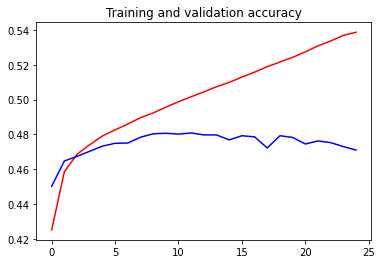

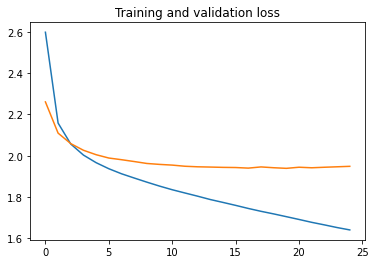

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc , 'r', label="Training Accuracy")
plt.plot  ( epochs, val_acc , 'b', label="Validation Accuracy")
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss , label="Training Loss")
plt.plot  ( epochs, val_loss , label="Validation Loss")
plt.title ('Training and validation loss'   )

In [ ]:
model.save("saved/model.h5")

In [ ]:
!pip3 install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!tensorflowjs_converter --input_format=keras ./saved/model.h5 ./tfjs_model

In [ ]:
!zip -r /content/saved_tfjs.zip ./tfjs_model/

  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/group1-shard1of3.bin (deflated 7%)
  adding: tfjs_model/group1-shard2of3.bin (deflated 7%)
  adding: tfjs_model/group1-shard3of3.bin (deflated 8%)
  adding: tfjs_model/model.json (deflated 96%)
